In [2]:
!pip install keras

import matplotlib.pyplot as plt
import keras
from PIL import Image
import numpy as np
import os

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1 - Preparing Data
Read in training, testing, and validation data. Downscale (resize) all images from 500x500 to 50x50. This way, we protect against overfitting and reduce the amount of features that our neural network must process. This also enables us to run the network on less capable hardware.

In [3]:
# training data
x_train = []
y_train = []

# read training images, and create one-hot encoded results
for fname in os.listdir("train/angular_leaf_spot"):
  f = os.path.join("train/angular_leaf_spot", fname)
  image = Image.open(f).resize((50, 50), 1)
  image = np.asarray(image)
  x_train.append(image)
  y_train.append([1, 0, 0])

for fname in os.listdir("train/bean_rust"):
  f = os.path.join("train/bean_rust", fname)
  image = Image.open(f).resize((50, 50), 1)
  image = np.asarray(image)
  x_train.append(image)
  y_train.append([0, 1, 0])

for fname in os.listdir("train/healthy"):
  f = os.path.join("train/healthy", fname)
  try:
    image = Image.open(f).resize((50, 50), 1)
    image = np.asarray(image)
  except:
    pass
  x_train.append(image)
  y_train.append([0, 0, 1])


In [4]:
# convert to np array with type float32, and normalize
x_train = np.array(x_train)
x_train = x_train.astype(np.float32)
x_train = x_train / 255.0

# convert one-hot encoded train data
y_train = np.array(y_train)

# print shape
print(x_train.shape)
print(y_train.shape)

(1035, 50, 50, 3)
(1035, 3)


In [5]:
# test data
x_test = []
y_test = []

# read test images, and create one-hot encoded results
for fname in os.listdir("test/angular_leaf_spot"):
  f = os.path.join("test/angular_leaf_spot", fname)
  image = Image.open(f).resize((50, 50), 1)
  image = np.asarray(image)
  x_test.append(image)
  y_test.append([1, 0, 0])

for fname in os.listdir("test/bean_rust"):
  f = os.path.join("test/bean_rust", fname)
  image = Image.open(f).resize((50, 50), 1)
  image = np.asarray(image)
  x_test.append(image)
  y_test.append([0, 1, 0])

for fname in os.listdir("test/healthy"):
  image = Image.open(f).resize((50, 50), 1)
  image = np.asarray(image)
  x_test.append(image)
  y_test.append([0, 0, 1])

In [6]:
# convert to np array with type float32, and normalize
x_test = np.array(x_test)
x_test = x_test.astype(np.float32)
x_test = x_test / 255.0

# convert one-hot encoded train data
y_test = np.array(y_test)

# print shape
print(x_test.shape)
print(y_test.shape)

(128, 50, 50, 3)
(128, 3)


In [7]:
# validation data (separate from training data)
x_validation = []
y_validation = []

# read validation images, and create one-hot encoded results
for fname in os.listdir("validation/angular_leaf_spot"):
  f = os.path.join("validation/angular_leaf_spot", fname)
  image = Image.open(f).resize((50, 50), 1)
  image = np.asarray(image)
  x_validation.append(image)
  y_validation.append([1, 0, 0])

for fname in os.listdir("validation/bean_rust"):
  f = os.path.join("validation/bean_rust", fname)
  try:
    image = Image.open(f).resize((50, 50), 1)
    image = np.asarray(image)
  except:
    pass
  x_validation.append(image)
  y_validation.append([0, 1, 0])

for fname in os.listdir("validation/healthy"):
  f = os.path.join("validation/healthy", fname)
  try:
    image = Image.open(f).resize((50, 50), 1)
    image = np.asarray(image)
  except:
    pass
  x_validation.append(image)
  y_validation.append([0, 0, 1])

In [8]:
x_validation = np.array(x_validation)
x_validation = x_validation.astype(np.float32)
x_validation = x_validation / 255.0

y_validation = np.array(y_validation)

print(x_validation.shape)
print(y_validation.shape)

(133, 50, 50, 3)
(133, 3)


# 2 - Leveraging Computer Vision with Neural Networks

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

model = Sequential()

model.add(Conv2D(50, 3, activation='relu'))
model.add(Conv2D(50, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.build(input_shape=(None, 50, 50, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 50)        1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 50)        22550     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 50)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 26450)             0         
                                                                 
 dense (Dense)               (None, 128)               3385728   
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [9]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
# train model
model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_validation, y_validation))

Epoch 1/100
33/33 [==============================] - 21s 602ms/step - loss: 1.1925 - accuracy: 0.4638 - val_loss: 0.8125 - val_accuracy: 0.6767
Epoch 2/100
33/33 [==============================] - 14s 414ms/step - loss: 0.8106 - accuracy: 0.6406 - val_loss: 0.6790 - val_accuracy: 0.7368
Epoch 3/100
33/33 [==============================] - 14s 416ms/step - loss: 0.6661 - accuracy: 0.7188 - val_loss: 0.6492 - val_accuracy: 0.7218
Epoch 4/100
33/33 [==============================] - 16s 480ms/step - loss: 0.5890 - accuracy: 0.7517 - val_loss: 0.5818 - val_accuracy: 0.7669
Epoch 5/100
33/33 [==============================] - 15s 460ms/step - loss: 0.5142 - accuracy: 0.7990 - val_loss: 0.5950 - val_accuracy: 0.7293
Epoch 6/100
33/33 [==============================] - 14s 414ms/step - loss: 0.4744 - accuracy: 0.8184 - val_loss: 0.6486 - val_accuracy: 0.7218
Epoch 7/100
33/33 [==============================] - 14s 416ms/step - loss: 0.3624 - accuracy: 0.8628 - val_loss: 0.7690 - val_accuracy:

In [10]:
# evaluate loss and accuracy
results = model.evaluate(x_test, y_test)
print("loss:", results[0])
print("accuracy:", results[1])

4/4 [==============================] - 1s 156ms/step - loss: 1.7316 - accuracy: 0.7812
loss: 1.7316131591796875
accuracy: 0.78125


4/4 [==============================] - 1s 282ms/step


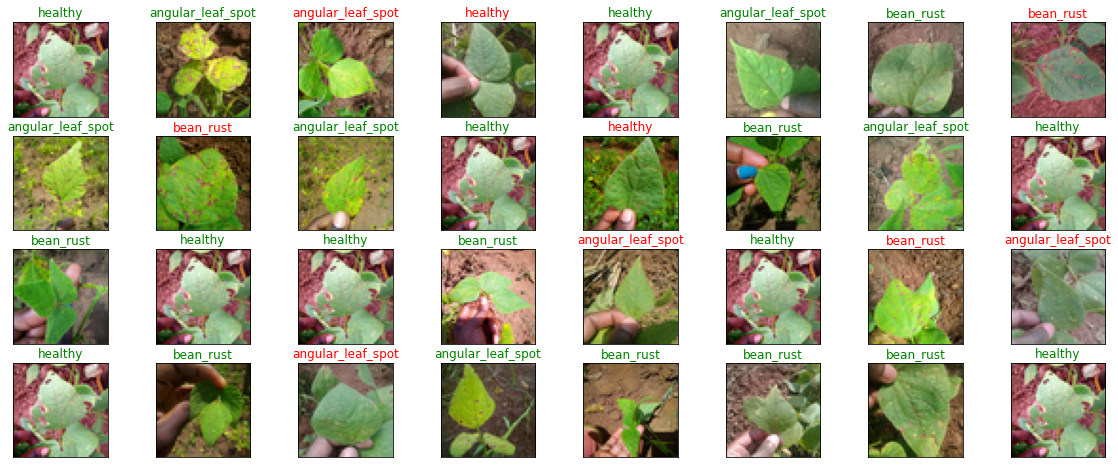

In [15]:
# make predictions
y_hat = model.predict(x_test)
labels = ['angular_leaf_spot', 'bean_rust', 'healthy']

# plot predicted labels (green for correct, red for false)
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title(labels[pred_idx], color=("green" if pred_idx == true_idx else "red"))